In [128]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, make_scorer, recall_score, f1_score, confusion_matrix, precision_score, balanced_accuracy_score
from sklearn.metrics import fbeta_score, classification_report

from sklearn.metrics import silhouette_score, silhouette_samples, homogeneity_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA, FastICA

from sklearn import random_projection
from sklearn.random_projection import SparseRandomProjection as RCA
from collections import defaultdict
from itertools import product
from sklearn.metrics.pairwise import pairwise_distances
import scipy.sparse as sps
from scipy.linalg import pinv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,auc,make_scorer,recall_score,roc_auc_score,precision_score, balanced_accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.exceptions import ConvergenceWarning, DataDimensionalityWarning,UndefinedMetricWarning
import warnings
import timeit

from sklearn.exceptions import ConvergenceWarning, DataDimensionalityWarning,UndefinedMetricWarning
import warnings
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder       
from sklearn.model_selection import learning_curve, validation_curve
from scipy.stats import norm, kurtosis

In [129]:
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", category=DataDimensionalityWarning, module="sklearn")
warnings.filterwarnings("ignore", category=UndefinedMetricWarning, module="sklearn")

warnings.filterwarnings("ignore", category=RuntimeWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

# Read dataset

In [130]:
sat = pd.read_csv('Satisfaction.csv')
print(sat.dtypes)
print(f'unique Value of our Target_class:  {sat.satisfaction.unique()}')

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure_Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On_board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_

# Preprocess

In [131]:
sat.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure_Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On_board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             83
satisfaction                          0


In [132]:
sat.dropna(inplace=True)

<AxesSubplot:>

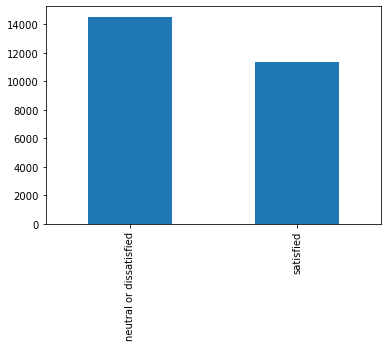

In [133]:
sat['satisfaction'].value_counts().plot(kind='bar')

In [134]:
sat['satisfaction'] = sat['satisfaction'].map({'neutral or dissatisfied': 0,'satisfied': 1})

Random under-sampling:
0    11365
1    11365
Name: satisfaction, dtype: int64


<AxesSubplot:title={'center':'Count (satisfaction)'}>

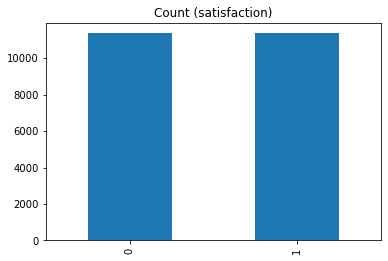

In [135]:
count_class_0, count_class_1 = sat['satisfaction'].value_counts()
class_0 = sat[sat['satisfaction'] == 0]
class_1 = sat[sat['satisfaction'] == 1]

class_0_under = class_0.sample(count_class_1, random_state = 7)

data_under = pd.concat([class_0_under, class_1], axis=0)

print('Random under-sampling:')
print(data_under.satisfaction.value_counts())

data_under.satisfaction.value_counts().plot(kind='bar', title='Count (satisfaction)')

In [136]:
data_under = data_under.drop(columns = ['Unnamed: 0','id','Gender','Customer_Type','Type_of_Travel','Class',
                                        #'','','','',''
                                       ])

# Scaling and splitting

In [137]:
data_under.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
5327,25,3056,3,5,5,5,3,3,3,3,3,4,3,2,4,3,15,47.0,0
21395,46,2075,4,1,1,1,1,3,4,4,4,4,4,2,4,3,2,0.0,0
5443,64,446,4,5,4,4,1,4,2,1,3,3,5,3,4,1,32,29.0,0
11953,65,1589,2,4,2,1,5,5,5,1,1,2,1,5,1,4,0,4.0,0
6649,57,991,4,2,4,4,2,4,3,5,5,4,5,2,5,2,4,0.0,0


In [138]:
X = data_under.drop('satisfaction', axis=1)
y = data_under["satisfaction"]
X_train_n, X_test_n, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

minMaxNorm = MinMaxScaler()
X_train = minMaxNorm.fit_transform(X_train_n)
X_test = minMaxNorm.fit_transform(X_test_n)

In [139]:
X_train.shape

(15911, 18)

In [140]:
LABELS = ['Age', 
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
        ]

# Helper functions

In [141]:
# PCA
def pca(X, cutoff_per, var_threashold):
    pca = PCA(cutoff_per, random_state=7)
    pca.fit(X)
    pca.explained_variance_

    row_index = range(1, pca.explained_variance_.shape[0] + 1)
    ev = pd.Series(data=pca.explained_variance_, index=row_index)
    evr = pd.Series(data=pca.explained_variance_ratio_, index=row_index)
    eigen = pd.Series(data=pca.singular_values_, index=row_index)

    
    pca_stats_df = pd.DataFrame()
    pca_stats_df['pca_stats_df'] = ev
    pca_stats_df['e-variance-ratio'] = evr
    pca_stats_df['eigen'] = eigen

    var_above = pca_stats_df[pca_stats_df['pca_stats_df'] >= var_threashold]
    print("Original PCA components")
    print(pca_stats_df)
    print(f"Threshold PCA components variance >= [{var_threashold:.2f}%]")
    print(var_above)
  
    constrained_cols = var_above.index-1
    X_pca_projected = pca.transform(X)

    return pd.DataFrame(X_pca_projected).filter(constrained_cols, axis=1)

# ICA
def max_kurtosis_indexes(X_projected, cutoff):
    tmp = pd.DataFrame(X_projected)
    tmp = tmp.kurt(axis=0)
    kurt = tmp.sort_values(ascending=False)
        
    max_k = kurt[0:cutoff]
    print(f"Top-{cutoff} Max Kurtosis -- ")
    print(max_k)
    print(max_k.index)
    return max_k.index


def ica_max_kurtosis(X, cutoff, dim=0):

    if dim == 0:
        dim = X.shape[1]-1
    elif dim < cutoff:
        dim = cutoff

    ica = FastICA(random_state=7)
    ica.set_params(n_components=dim)
    X_projected = ica.fit_transform(X)

    max_k_idexes = max_kurtosis_indexes(X_projected,cutoff)
    
    X_proj_df = pd.DataFrame(X_projected)
    X_proj_df  = X_proj_df.filter( max_k_idexes, axis=1 )
        
    return X_proj_df

# RP
def rp(X, dim, r_state=7):
    rp = RCA(random_state=r_state, n_components=dim)
    fitted = rp.fit(X)
    X_rca_projected = rp.transform(X)
    return pd.DataFrame(X_rca_projected)

# Random Forest
def rfc_research(X,y):
                 
        rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=RND_STATE, n_jobs=-1)
        fs = rfc.fit(X,y).feature_importances_

#         important_features = pd.Series(np.sort(fs)[::-1])
        return fs
        
def rfc(X,y):
                 
        rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=7, n_jobs=-1)
        fs = rfc.fit(X,y).feature_importances_
        indexes_found = np.where(fs >= 0.10)
        
        X_reduced = pd.DataFrame(X)
        X_reduced = X_reduced.filter(indexes_found[0], axis=1)
        return X_reduced

In [142]:
print(f"\n---- RUNNING PCA -------")
X_pca_proj = pca(X_train, 0.9, 0.1)
X_pca_proj_test = pca(X_test, 0.9, 0.1)

print(f"---- RUNNING ICA -------")
X_ica_proj = ica_max_kurtosis(X_train ,5, dim=17)
X_ica_proj_test = ica_max_kurtosis(X_test, 5, dim=17)

print(f"\n---- RUNNING RP -------")
r_states = [0, 77, 888, 5678, 98765]
X_rp_proj = []
X_rp_proj_test = [];
for r in r_states:
    X_rp = rp(X_train, 13, r)
    X_rp_test = rp(X_test,13, r)
    
    X_rp_proj.append(X_rp)
    X_rp_proj_test.append(X_rp_test)

print(f"\n---- RUNNING Random Forest RFC -------")
X_rfc_proj = rfc(X_train,y_train)
X_rfc_proj_test = rfc(X_test, y_test)


---- RUNNING PCA -------
Original PCA components
    pca_stats_df  e-variance-ratio      eigen
1       0.295041          0.245390  68.513502
2       0.212402          0.176658  58.131905
3       0.162725          0.135341  50.881842
4       0.093180          0.077499  38.503208
5       0.084707          0.070452  36.710802
6       0.053230          0.044272  29.101314
7       0.050138          0.041701  28.243613
8       0.045182          0.037579  26.811333
9       0.036328          0.030214  24.041137
10      0.034228          0.028468  23.336122
11      0.029919          0.024884  21.817716
Threshold PCA components variance >= [0.10%]
   pca_stats_df  e-variance-ratio      eigen
1      0.295041          0.245390  68.513502
2      0.212402          0.176658  58.131905
3      0.162725          0.135341  50.881842
Original PCA components
    pca_stats_df  e-variance-ratio      eigen
1       0.316172          0.245748  46.429059
2       0.223264          0.173535  39.015551
3       0.1

In [143]:
scorer = make_scorer(precision_score)

In [144]:
# Raw data
def quiet_stats(estimator, X_data, y_data ):
    predicted = estimator.predict(X_data)
    precision_0 = precision_score(y_data, predicted, pos_label=0)
    precision_1 = precision_score(y_data, predicted)
    c_matrix = confusion_matrix(y_data, predicted)
    return precision_0, precision_1, c_matrix

def train_and_stats(label, mlp_cls, X, y):
    start_time = timeit.default_timer()
    mlp_trained = mlp_cls.fit(X, y)
    end_time = timeit.default_timer()
    total_time = end_time - start_time
    
    rc0, rc1, cnfm = quiet_stats(mlp_cls, X, y)
    
    return mlp_trained.n_iter_, total_time, rc0, rc1, cnfm
    
def loop_quiet_stats(estimator, X_data_list, y_data, X_data_test_list, y_test_data):
    
    results = {}
    df_holder = pd.DataFrame()
    for i in range(len(X_data_list)):
        print(f" --- Starting iteration [{i}]")
        start_time = timeit.default_timer()
        mlp_trained = estimator.fit(X_data_list[i], y_data)
        end_time = timeit.default_timer()
        total_time = end_time - start_time
        q0, q1, _ = quiet_stats(mlp_trained, X_data_list[i], y_data)
        results['total_time'] , results['iterations']= total_time, mlp_trained.n_iter_
        results['precision_0'],results['precision_1']=  q0, q1
        q0_t, q1_t, _ = quiet_stats(mlp_trained, X_data_test_list[i], y_test_data)
        results['precision_0_test'], results['precision_1_test']=  q0_t, q1_t
        df_holder = df_holder.append(results, ignore_index=True)
    
    return df_holder

#PCA

def stats_pac( label, estimator, X_data, y_data ):
    predicted = estimator.predict(X_data)
    print ('Confusion matrix\n', confusion_matrix(y_data, predicted))
    
    print ('Precision - label 0: %0.4f'% precision_score(y_data, predicted, pos_label=0))
    print ('Precision - label 1: %0.4f'% precision_score(y_data, predicted))   
    print (classification_report(y_data, predicted, labels=[0,1]))
    



In [145]:
def train_and_print_stats(label, mlp_cls, X, y):
    start_time = timeit.default_timer()
    mlp_trained = mlp_cls.fit(X, y)
    end_time = timeit.default_timer()
    total_time = end_time - start_time
    
    print ('****** %s ******' % label)
    print ('Total Iterations %d'% mlp_trained.n_iter_)
    print ('Total Train Time %.3f'% total_time)
    
    stats_pac(label, mlp_trained, X, y)
    return mlp_trained


def save_results(key, q1, q2):
    iter_cnt, time, q0_train, q1_train, confuse_train =q1
    q0_test, q1_test, confuse_test = q2
    RESULTS[key] = {'iter_cnt':iter_cnt, 'time':time, 'q1':q1_train, 'q1_t':q1_test}
    
def run_nn_classifier(title, q_key, estimator, X_train, X_test):
    train_out = train_and_stats(title, estimator, X_train, y_train)
    test_out = quiet_stats(estimator, X_test, y_test)
    save_results(q_key, train_out, test_out)
    


In [146]:
RESULTS = {}

In [147]:
#RAW NN
mlp_RAW_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
run_nn_classifier('NN - Raw',  'RAW', mlp_RAW_target, X_train, X_test)

#PCA NN
mlp_PCA_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
run_nn_classifier('NN - PCA',  'PCA', mlp_PCA_target, X_train, X_test)


#ICA NN
mlp_ICA_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
run_nn_classifier('NN - ICA Malicious',  'ICA', mlp_ICA_target,  X_ica_proj, X_ica_proj_test)

#RP Extra attrs
mlp_RP_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
mean_rp_stats = loop_quiet_stats(mlp_RP_target, X_rp_proj, y_train, X_rp_proj_test, y_test )
rp_mean = mean_rp_stats.mean(axis=0)

RESULTS['RP'] = {'iter_cnt':rp_mean['iterations'], 
                           'time':rp_mean['total_time'], 'q1':rp_mean['precision_1'], 'q1_t':rp_mean['precision_1_test']}

#R Forest Extra attrs
mlp_Rforest_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
run_nn_classifier('MLP Random Forest Malicious',  'RFC', mlp_Rforest_target,  X_rfc_proj, X_rfc_proj_test)

 --- Starting iteration [0]
 --- Starting iteration [1]
 --- Starting iteration [2]
 --- Starting iteration [3]
 --- Starting iteration [4]


In [21]:
train_and_print_stats("RAW", mlp_RAW_target, X_train, y_train)
stats_pac("RAW", mlp_RAW_target, X_test, y_test)

train_and_print_stats("PCA", mlp_PCA_target, X_pca_proj, y_train)
stats_pac("PCA", mlp_PCA_target, X_pca_proj_test, y_test)

train_and_print_stats("ICA", mlp_ICA_target, X_ica_proj, y_train)
stats_pac("ICA", mlp_ICA_target, X_ica_proj_test, y_test)

train_and_print_stats("RFC", mlp_Rforest_target, X_rfc_proj, y_train)
stats_pac("RFC", mlp_Rforest_target, X_rfc_proj_test, y_test)

#train_and_print_stats("RP", mlp_RP_target, X_rp_proj, y_train)
#stats_pac("RP", mlp_RP_target, X_rp_proj_test, y_test)

****** RAW ******
Total Iterations 36
Total Train Time 2.419
Confusion matrix
 [[7584  476]
 [ 802 7049]]
Precision - label 0: 0.9044
Precision - label 1: 0.9367
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      8060
           1       0.94      0.90      0.92      7851

    accuracy                           0.92     15911
   macro avg       0.92      0.92      0.92     15911
weighted avg       0.92      0.92      0.92     15911

Confusion matrix
 [[3135  170]
 [ 481 3033]]
Precision - label 0: 0.8670
Precision - label 1: 0.9469
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3305
           1       0.95      0.86      0.90      3514

    accuracy                           0.90      6819
   macro avg       0.91      0.91      0.90      6819
weighted avg       0.91      0.90      0.90      6819

****** PCA ******
Total Iterations 80
Total Train Time 4.797
Confusion matrix
 [[65

In [22]:
#WEAK LEARNER Spot checks
def weak_learner_check(X,y, label):
    dt = DecisionTreeClassifier(max_depth=5)
    start_time = timeit.default_timer()
    trained = dt.fit(X, y)
    end_time = timeit.default_timer()
    total_time = end_time - start_time
    stats_pac(label,dt, X,y)
    return dt
    
learner_raw = weak_learner_check(X_train, y_train, 'Weak Learner check RAW-train',)
stats_pac('Weak Learner check RAW-test',learner_raw,X_test, y_test)
    

learner_pca= weak_learner_check(X_pca_proj, y_train, 'Weak Learner check PCA-01-train',)
stats_pac('Weak Learner check PCA-01-test',learner_pca, X_pca_proj_test,y_test )

learner_1_ica= weak_learner_check(X_ica_proj, y_train, 'Weak Learner check ica Mal Train',)
stats_pac('Weak Learner check ica Mal Test',learner_1_ica, X_ica_proj_test,y_test)


Confusion matrix
 [[6937 1123]
 [ 988 6863]]
Precision - label 0: 0.8753
Precision - label 1: 0.8594
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8060
           1       0.86      0.87      0.87      7851

    accuracy                           0.87     15911
   macro avg       0.87      0.87      0.87     15911
weighted avg       0.87      0.87      0.87     15911

Confusion matrix
 [[2817  488]
 [ 457 3057]]
Precision - label 0: 0.8604
Precision - label 1: 0.8623
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3305
           1       0.86      0.87      0.87      3514

    accuracy                           0.86      6819
   macro avg       0.86      0.86      0.86      6819
weighted avg       0.86      0.86      0.86      6819

Confusion matrix
 [[6785 1275]
 [2177 5674]]
Precision - label 0: 0.7571
Precision - label 1: 0.8165
              precision    recall  f1-score

In [148]:
def get_em_clusters(X, N, cv_type):
    gmm = GMM(n_components=N, covariance_type=cv_type, random_state=7)
    pred_clusters = gmm.fit_predict(X)
    return pred_clusters

def get_km_clusters(X, N):
    km = KMeans(n_clusters=N,random_state=7, max_iter=10000 )
    pred_clusters = km.fit_predict(X)
    return pred_clusters
       
CLUSTERS_KM=get_km_clusters(pd.DataFrame(X_train), 3)
CLUSTERS_EM=get_em_clusters(pd.DataFrame(X_train), 5, 'tied')

CLUSTERS_KM_T=get_km_clusters(pd.DataFrame(X_test), 3)
CLUSTERS_EM_T=get_em_clusters(pd.DataFrame(X_test), 5, 'tied')

In [149]:
#one hot play
def one_hot_cluster(X):
    
    out_attrs = {}
    r,c = X.shape

    for cluster in ['km','em']:
        if r == X_test.shape[0]:
            pred_clusters = CLUSTERS_KM_T if cluster == 'km' else CLUSTERS_EM_T
        else: 
            pred_clusters = CLUSTERS_KM if cluster == 'km' else CLUSTERS_EM
        clust_df = pd.DataFrame()
        clust_df[cluster] = pd.Series(pred_clusters)

        # 1. INSTANTIATE
        o_hot_enc = OneHotEncoder()

        # 2. FIT
        o_hot_enc.fit(clust_df)

        # 3. Transform
        onehotlabels = o_hot_enc.transform(clust_df).toarray()
    
        # 4. add the the encodings back as features
        X_copy = X.copy()
        X_copy = pd.concat([X_copy, pd.DataFrame(onehotlabels)], axis=1)
        out_attrs[cluster] = X_copy
    
    return out_attrs['km'], out_attrs['em']

X_raw_km_extra_attr, X_raw_em_extra_attr = one_hot_cluster(pd.DataFrame(X_train)) 
X_pca_km_extra_attr, X_pca_em_extra_attr = one_hot_cluster(X_pca_proj)
X_ica_km_extra_attr, X_ica_em_extra_attr = one_hot_cluster(X_ica_proj)
X_rfc_km_extra_attr, X_rfc_em_extra_attr = one_hot_cluster(X_rfc_proj)

X_rp_km_extra_attr_list = [];X_rp_em_extra_attr_list = []
for X_rp_pro in X_rp_proj:
    tmp_km_, tmp_em_ = one_hot_cluster(X_rp_pro)
    X_rp_km_extra_attr_list.append(tmp_km_)
    X_rp_em_extra_attr_list.append(tmp_em_)

X_raw_km_extra_attr_t, X_raw_em_extra_attr_t = one_hot_cluster(pd.DataFrame(X_test)) 
X_pca_km_extra_attr_t, X_pca_em_extra_attr_t = one_hot_cluster(X_pca_proj_test)
X_ica_km_extra_attr_t, X_ica_em_extra_attr_t = one_hot_cluster(X_ica_proj_test)
X_rfc_km_extra_attr_t, X_rfc_em_extra_attr_t = one_hot_cluster(X_rfc_proj_test)

X_rp_km_extra_attr_list_t = [];X_rp_em_extra_attr_list_t = []
for X_rp_pro_t in X_rp_proj_test:
    tmp_km_, tmp_em_ = one_hot_cluster(X_rp_pro_t)
    X_rp_km_extra_attr_list_t.append(tmp_km_)
    X_rp_em_extra_attr_list_t.append(tmp_em_)

In [150]:
#RAW Extra attrs
mlp_RAW_attr_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)

run_nn_classifier('NN ATTR-KM - Raw',  'Kmeans: RAW', mlp_RAW_attr_target,  X_raw_km_extra_attr, X_raw_km_extra_attr_t)
run_nn_classifier('NN ATTR-EM  - Raw',  'EM: RAW', mlp_RAW_attr_target,  X_raw_em_extra_attr, X_raw_em_extra_attr_t)



#PCA Extra attrs
mlp_PCA_attr_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)

run_nn_classifier('NN ATTR-KM PCA',  'Kmeans: PCA', mlp_PCA_attr_target,  X_pca_km_extra_attr, X_pca_km_extra_attr_t)
run_nn_classifier('NN ATTR-EM PCA',  'EM: PCA', mlp_PCA_attr_target,  X_pca_em_extra_attr, X_pca_em_extra_attr_t)



#ICA Extra attrs
mlp_ICA_attr_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
run_nn_classifier('NN ATTR-KM ICA',  'Kmeans: ICA', mlp_ICA_attr_target,  X_ica_km_extra_attr, X_ica_km_extra_attr_t)
run_nn_classifier('NN ATTR-EM ICA',  'EM: ICA', mlp_ICA_attr_target,  X_ica_em_extra_attr, X_ica_em_extra_attr_t)





#RP Extra attrs
mlp_RP_attr_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)


mean_stats_attr_km = loop_quiet_stats(mlp_RP_attr_target, X_rp_km_extra_attr_list, y_train, X_rp_km_extra_attr_list_t, y_test )
rp_km_mean = mean_stats_attr_km.mean(axis=0)

mean_stats_attr_em = loop_quiet_stats(mlp_RP_attr_target, X_rp_em_extra_attr_list, y_train, X_rp_em_extra_attr_list_t, y_test )
rp_em_mean = mean_stats_attr_em.mean(axis=0)


RESULTS['Kmeans: RP'] = {'iter_cnt':rp_km_mean['iterations'], 
                           'time':rp_km_mean['total_time'], 'q1':rp_km_mean['precision_1'], 'q1_t':rp_km_mean['precision_1_test']}
RESULTS['EM: RP'] = {'iter_cnt':rp_em_mean['iterations'], 
                           'time':rp_em_mean['total_time'], 'q1':rp_em_mean['precision_1'], 'q1_t':rp_em_mean['precision_1_test']}




#R Forest Extra attrs
mlp_Rforest_attr_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
run_nn_classifier('NN ATTR-KM Random Forest',  'Kmeans: RFC', mlp_Rforest_attr_target,  X_rfc_km_extra_attr, X_rfc_km_extra_attr_t)
run_nn_classifier('NN ATTR-EM Random Forest',  'EM: RFC', mlp_Rforest_attr_target,  X_rfc_em_extra_attr, X_rfc_em_extra_attr_t)

 --- Starting iteration [0]
 --- Starting iteration [1]
 --- Starting iteration [2]
 --- Starting iteration [3]
 --- Starting iteration [4]
 --- Starting iteration [0]
 --- Starting iteration [1]
 --- Starting iteration [2]
 --- Starting iteration [3]
 --- Starting iteration [4]


In [28]:
def format_places(num_val, places):
    fmt_str = f"%0.{places}f"
    return fmt_str%num_val

RES_LABLES = {'RAW': 'Neural Network with raw features', 
              'PCA': 'Neural Network with PCA projections', 
              'ICA': 'Neural Network with ICA projections', 
              'RP': 'Neural Network with RP projections', 
              'RFC': 'Neural Network with Random Forest reduction',
              'Kmeans: RAW': 'Neural Network with raw features, adding Kmeans clustering labels as a new feature', 
              'EM: RAW': 'Neural Network with raw features, adding EM clustering labels as a new feature', 
              'Kmeans: PCA': 'Neural Network with PCA projections, adding Kmeans clustering labels as a new feature', 
              'EM: PCA': 'Neural Network with PCA projections, adding EM clustering labels as a new feature', 
              'Kmeans: ICA': 'Neural Network with ICA projections, adding Kmeans clustering labels as a new feature', 
              'EM: ICA': 'Neural Network with ICA projections, adding EM clustering labels as a new feature' , 
              'Kmeans: RP': 'Neural Network with RP projections, adding Kmeans clustering labels as a new feature', 
              'EM: RP': 'Neural Network with RP projections, adding EM clustering labels as a new feature', 
              'Kmeans: RFC': 'Neural Network with RFC, adding Kmeans clustering labels as a new feature', 
              'EM: RFC': 'Neural Network with RFC, adding EM clustering labels as a new feature'
             }

tmp_res = []
for key, label in RES_LABLES.items():
    val = RESULTS[key]
    time_fmt = format_places(val['time'],3)
    q1_fmt = format_places(val['q1'],4)
    q1_fmt_t = format_places(val['q1_t'],3)
    prep = {'run_name':key, 'train_time':time_fmt ,'precision_train':q1_fmt, 'precision_test':q1_fmt_t}
    prep['Description'] = label

    tmp_res.append(prep)
    
RES_df = pd.DataFrame(tmp_res)  
RES_df

,run_name,train_time,precision_score_train,precision_score_test,Description
0,RAW,2.627,0.9367,0.947,Neural Network with raw features
1,PCA,2.752,0.9367,0.947,Neural Network with PCA projections
2,ICA,1.358,0.6191,0.552,Neural Network with ICA projections
3,RP,3.938,0.8867,0.895,Neural Network with RP projections
4,RFC,1.427,0.7839,0.801,Neural Network with Random Forest reduction
5,Kmeans: RAW,4.737,0.9395,0.943,"Neural Network with raw features, adding Kmean..."
6,EM: RAW,4.508,0.9056,0.915,"Neural Network with raw features, adding EM cl..."
7,Kmeans: PCA,1.347,0.7979,0.690,"Neural Network with PCA projections, adding Km..."
8,EM: PCA,2.575,0.8386,0.672,"Neural Network with PCA projections, adding EM..."
9,Kmeans: ICA,2.063,0.6657,0.390,"Neural Network with ICA projections, adding Km..."


In [151]:
def format_places(num_val, places):
    fmt_str = f"%0.{places}f"
    return fmt_str%num_val

RES_LABLES = {'RAW': 'Neural Network with raw features', 
              'PCA': 'Neural Network with PCA projections', 
              'ICA': 'Neural Network with ICA projections', 
              'RP': 'Neural Network with RP projections', 
              'RFC': 'Neural Network with Random Forest reduction',
              'Kmeans: RAW': 'Neural Network with raw features, adding Kmeans clustering labels as a new feature', 
              'EM: RAW': 'Neural Network with raw features, adding EM clustering labels as a new feature', 
              'Kmeans: PCA': 'Neural Network with PCA projections, adding Kmeans clustering labels as a new feature', 
              'EM: PCA': 'Neural Network with PCA projections, adding EM clustering labels as a new feature', 
              'Kmeans: ICA': 'Neural Network with ICA projections, adding Kmeans clustering labels as a new feature', 
              'EM: ICA': 'Neural Network with ICA projections, adding EM clustering labels as a new feature' , 
              'Kmeans: RP': 'Neural Network with RP projections, adding Kmeans clustering labels as a new feature', 
              'EM: RP': 'Neural Network with RP projections, adding EM clustering labels as a new feature', 
              'Kmeans: RFC': 'Neural Network with RFC, adding Kmeans clustering labels as a new feature', 
              'EM: RFC': 'Neural Network with RFC, adding EM clustering labels as a new feature'
             }

tmp_res = []
for key, label in RES_LABLES.items():
    val = RESULTS[key]
    time_fmt = format_places(val['time'],3)
    q1_fmt = format_places(val['q1'],4)
    q1_fmt_t = format_places(val['q1_t'],3)
    prep = {'run_name':key, 'train_time':time_fmt ,'precision_train':q1_fmt, 'precision_test':q1_fmt_t}
    prep['Description'] = label

    tmp_res.append(prep)
    
RES_df = pd.DataFrame(tmp_res)  
RES_df

,run_name,train_time,precision_train,precision_test,Description
0,RAW,31.271,0.9367,0.947,Neural Network with raw features
1,PCA,24.513,0.9367,0.947,Neural Network with PCA projections
2,ICA,14.208,0.6191,0.552,Neural Network with ICA projections
3,RP,44.506,0.8867,0.895,Neural Network with RP projections
4,RFC,14.679,0.7839,0.801,Neural Network with Random Forest reduction
5,Kmeans: RAW,64.853,0.8965,0.889,"Neural Network with raw features, adding Kmean..."
6,EM: RAW,54.886,0.9056,0.915,"Neural Network with raw features, adding EM cl..."
7,Kmeans: PCA,29.748,0.7854,0.806,"Neural Network with PCA projections, adding Km..."
8,EM: PCA,26.704,0.8386,0.672,"Neural Network with PCA projections, adding EM..."
9,Kmeans: ICA,16.463,0.6728,0.513,"Neural Network with ICA projections, adding Km..."


In [154]:
def format_places(num_val, places):
    fmt_str = f"%0.{places}f"
    return fmt_str%num_val

RES_LABLES = {#'RAW': 'Neural Network with raw features', 
              #'PCA': 'Neural Network with PCA projections', 
              #'ICA': 'Neural Network with ICA projections', 
              #'RP': 'Neural Network with RP projections', 
              #'RFC': 'Neural Network with Random Forest reduction',
              'Kmeans: RAW': 'NN, adding Km labels as a new feature', 
              'EM: RAW': 'NN, adding EM labels as a new feature', 
              'Kmeans: PCA': 'NN with PCA, adding Km labels as a new feature', 
              'EM: PCA': 'NN with PCA, adding EM labels as a new feature', 
              'Kmeans: ICA': 'NN with ICA, adding Km labels as a new feature', 
              'EM: ICA': 'NN with ICA, adding EM labels as a new feature' , 
              'Kmeans: RP': 'NN with RP, adding Km labels as a new feature', 
              'EM: RP': 'NN with RP, adding EM labels as a new feature', 
              'Kmeans: RFC': 'NN with RFC, adding Km labels as a new feature', 
              'EM: RFC': 'NN with RFC, adding EM labels as a new feature'
             }

tmp_res = []
for key, label in RES_LABLES.items():
    val = RESULTS[key]
    time_fmt = format_places(val['time'],3)
    q1_fmt = format_places(val['q1'],4)
    q1_fmt_t = format_places(val['q1_t'],3)
    prep = {'run_name':key, 'train_time':time_fmt ,'precision_train':q1_fmt, 'precision_test':q1_fmt_t}
    prep['Description'] = label

    tmp_res.append(prep)
    
RES_df = pd.DataFrame(tmp_res)  
RES_df

,run_name,train_time,precision_train,precision_test,Description
0,Kmeans: RAW,64.853,0.8965,0.889,"NN, adding Km labels as a new feature"
1,EM: RAW,54.886,0.9056,0.915,"NN, adding EM labels as a new feature"
2,Kmeans: PCA,29.748,0.7854,0.806,"NN with PCA, adding Km labels as a new feature"
3,EM: PCA,26.704,0.8386,0.672,"NN with PCA, adding EM labels as a new feature"
4,Kmeans: ICA,16.463,0.6728,0.513,"NN with ICA, adding Km labels as a new feature"
5,EM: ICA,18.198,0.6679,0.340,"NN with ICA, adding EM labels as a new feature"
6,Kmeans: RP,36.466,0.8784,0.859,"NN with RP, adding Km labels as a new feature"
7,EM: RP,51.446,0.8775,0.816,"NN with RP, adding EM labels as a new feature"
8,Kmeans: RFC,35.538,0.8504,0.792,"NN with RFC, adding Km labels as a new feature"
9,EM: RFC,19.746,0.8429,0.677,"NN with RFC, adding EM labels as a new feature"


In [45]:
# Accuracy
# Raw data
def quiet_stats_accuracy(estimator, X_data, y_data ):
    predicted = estimator.predict(X_data)
    accuracy_0 = accuracy_score(y_data, predicted)
    accuracy_1 = accuracy_score(y_data, predicted)
    c_matrix = confusion_matrix(y_data, predicted)
    return accuracy_0, accuracy_1, c_matrix

def train_and_stats_accuracy(label, mlp_cls, X, y):
    start_time = timeit.default_timer()
    mlp_trained = mlp_cls.fit(X, y)
    end_time = timeit.default_timer()
    total_time = end_time - start_time
    
    rc0, rc1, cnfm = quiet_stats(mlp_cls, X, y)
    
    return mlp_trained.n_iter_, total_time, rc0, rc1, cnfm
    
def loop_quiet_stats_accuracy(estimator, X_data_list, y_data, X_data_test_list, y_test_data):
    
    results = {}
    df_holder = pd.DataFrame()
    for i in range(len(X_data_list)):
        print(f" --- Starting iteration [{i}]")
        start_time = timeit.default_timer()
        mlp_trained = estimator.fit(X_data_list[i], y_data)
        end_time = timeit.default_timer()
        total_time = end_time - start_time
        a0, a1, _ = quiet_stats_accuracy(mlp_trained, X_data_list[i], y_data)
        results['total_time'] , results['iterations']= total_time, mlp_trained.n_iter_
        results['accuracy_0'],results['accuracy_1']=  a0, a1
        a0_t, a1_t, _ = quiet_stats_accuracy(mlp_trained, X_data_test_list[i], y_test_data)
        results['accuracy_0_test'], results['accuracy_1_test']=  a0_t, a1_t
        df_holder = df_holder.append(results, ignore_index=True)
    
    return df_holder

#PCA

def stats_pac_accuracy( label, estimator, X_data, y_data ):
    predicted = estimator.predict(X_data)
    print ('Confusion matrix\n', confusion_matrix(y_data, predicted))
    
    print ('Accuracy - label 0: %0.4f'% accuracy_score(y_data, predicted, pos_label=0))
    print ('Accuracy - label 1: %0.4f'% accuracy_score(y_data, predicted))   
    print (classification_report(y_data, predicted, labels=[0,1]))
    



In [46]:
def train_and_print_stats_accuracy(label, mlp_cls, X, y):
    start_time = timeit.default_timer()
    mlp_trained = mlp_cls.fit(X, y)
    end_time = timeit.default_timer()
    total_time = end_time - start_time
    
    print ('****** %s ******' % label)
    print ('Total Iterations %d'% mlp_trained.n_iter_)
    print ('Total Train Time %.3f'% total_time)
    
    stats_pac_accuracy(label, mlp_trained, X, y)
    return mlp_trained


def save_results_accuracy(key, a1, a2):
    iter_cnt, time, a0_train, a1_train, confuse_train =a1
    a0_test, a1_test, confuse_test = a2
    RESULTSA[key] = {'iter_cnt':iter_cnt, 'time':time, 'a1':a1_train, 'a1_t':a1_test}
    
def run_nn_classifier_accuracy(title, q_key, estimator, X_train, X_test):
    train_out = train_and_stats(title, estimator, X_train, y_train)
    test_out = quiet_stats(estimator, X_test, y_test)
    save_results(q_key, train_out, test_out)

RESULTSA = {}

In [47]:
# accuracy
#RAW NN
mlp_RAW_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
run_nn_classifier_accuracy('NN - Raw',  'RAW', mlp_RAW_target, X_train, X_test)

#PCA NN
mlp_PCA_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
run_nn_classifier_accuracy('NN - PCA',  'PCA', mlp_PCA_target, X_train, X_test)


#ICA NN
mlp_ICA_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
run_nn_classifier_accuracy('NN - ICA Malicious',  'ICA', mlp_ICA_target,  X_ica_proj, X_ica_proj_test)

#RP Extra attrs
mlp_RP_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
mean_rp_stats = loop_quiet_stats_accuracy(mlp_RP_target, X_rp_proj, y_train, X_rp_proj_test, y_test )
rp_mean = mean_rp_stats.mean(axis=0)

RESULTSA['RP'] = {'iter_cnt':rp_mean['iterations'], 
                           'time':rp_mean['total_time'], 'a1':rp_mean['accuracy_1'], 'a1_t':rp_mean['accuracy_1_test']}

#R Forest Extra attrs
mlp_Rforest_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
run_nn_classifier_accuracy('MLP Random Forest Malicious',  'RFC', mlp_Rforest_target,  X_rfc_proj, X_rfc_proj_test)

 --- Starting iteration [0]
 --- Starting iteration [1]
 --- Starting iteration [2]
 --- Starting iteration [3]
 --- Starting iteration [4]


In [48]:
def get_em_clusters(X, N, cv_type):
    gmm = GMM(n_components=N, covariance_type=cv_type, random_state=7)
    pred_clusters = gmm.fit_predict(X)
    return pred_clusters

def get_km_clusters(X, N):
    km = KMeans(n_clusters=N,random_state=7, max_iter=10000 )
    pred_clusters = km.fit_predict(X)
    return pred_clusters
       
CLUSTERS_KM=get_km_clusters(pd.DataFrame(X_train), 3)
CLUSTERS_EM=get_em_clusters(pd.DataFrame(X_train), 5, 'tied')

CLUSTERS_KM_T=get_km_clusters(pd.DataFrame(X_test), 3)
CLUSTERS_EM_T=get_em_clusters(pd.DataFrame(X_test), 5, 'tied')

In [49]:
#accuracy
#RAW Extra attrs
mlp_RAW_attr_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)

run_nn_classifier_accuracy('NN ATTR-KM - Raw',  'Kmeans: RAW', mlp_RAW_attr_target,  X_raw_km_extra_attr, X_raw_km_extra_attr_t)
run_nn_classifier_accuracy('NN ATTR-EM  - Raw',  'EM: RAW', mlp_RAW_attr_target,  X_raw_em_extra_attr, X_raw_em_extra_attr_t)



#PCA Extra attrs
mlp_PCA_attr_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)

run_nn_classifier_accuracy('NN ATTR-KM PCA',  'Kmeans: PCA', mlp_PCA_attr_target,  X_pca_km_extra_attr, X_pca_km_extra_attr_t)
run_nn_classifier_accuracy('NN ATTR-EM PCA',  'EM: PCA', mlp_PCA_attr_target,  X_pca_em_extra_attr, X_pca_em_extra_attr_t)



#ICA Extra attrs
mlp_ICA_attr_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
run_nn_classifier_accuracy('NN ATTR-KM ICA',  'Kmeans: ICA', mlp_ICA_attr_target,  X_ica_km_extra_attr, X_ica_km_extra_attr_t)
run_nn_classifier_accuracy('NN ATTR-EM ICA',  'EM: ICA', mlp_ICA_attr_target,  X_ica_em_extra_attr, X_ica_em_extra_attr_t)





#RP Extra attrs
mlp_RP_attr_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)


mean_stats_attr_km = loop_quiet_stats_accuracy(mlp_RP_attr_target, X_rp_km_extra_attr_list, y_train, X_rp_km_extra_attr_list_t, y_test )
rp_km_mean = mean_stats_attr_km.mean(axis=0)

mean_stats_attr_em = loop_quiet_stats_accuracy(mlp_RP_attr_target, X_rp_em_extra_attr_list, y_train, X_rp_em_extra_attr_list_t, y_test )
rp_em_mean = mean_stats_attr_em.mean(axis=0)


RESULTSA['Kmeans: RP'] = {'iter_cnt':rp_km_mean['iterations'], 
                           'time':rp_km_mean['total_time'], 'a1':rp_km_mean['accuracy_1'], 'a1_t':rp_km_mean['accuracy_1_test']}
RESULTSA['EM: RP'] = {'iter_cnt':rp_em_mean['iterations'], 
                           'time':rp_em_mean['total_time'], 'a1':rp_em_mean['accuracy_1'], 'q1_t':rp_em_mean['accuracy_1_test']}




#R Forest Extra attrs
mlp_Rforest_attr_target = MLPClassifier(hidden_layer_sizes=(110,), max_iter=500, random_state=7, learning_rate_init = 0.1)
run_nn_classifier_accuracy('NN ATTR-KM Random Forest',  'Kmeans: RFC', mlp_Rforest_attr_target,  X_rfc_km_extra_attr, X_rfc_km_extra_attr_t)
run_nn_classifier_accuracy('NN ATTR-EM Random Forest',  'EM: RFC', mlp_Rforest_attr_target,  X_rfc_em_extra_attr, X_rfc_em_extra_attr_t)

 --- Starting iteration [0]
 --- Starting iteration [1]
 --- Starting iteration [2]
 --- Starting iteration [3]
 --- Starting iteration [4]
 --- Starting iteration [0]
 --- Starting iteration [1]
 --- Starting iteration [2]
 --- Starting iteration [3]
 --- Starting iteration [4]


eps=0.100000 and n_samples=15911 lead to a target dimension of 8292 which is larger than the original space with n_features=18
Optimal no. of components as per GRP: 3


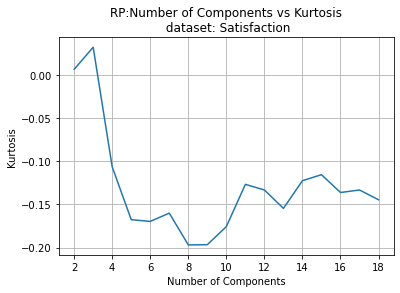

In [91]:
# Random Projections (Initial Try)
initial_features_n = len(X_train[0])
try:
  proj_grp = random_projection.GaussianRandomProjection(random_state=7)
  X_transformed = proj_grp.fit_transform(X_train)
except Exception as e:
  print(e)

kurtosis_grp = []
random_states = [0, 77, 888, 5678, 98765, 543216, 6789432, 98273615, 123456789, 7]
for dimension in range(2, initial_features_n + 1):
  k_vals_grp = []
  for rng in random_states:
    for iter in range(500):
          grp = random_projection.GaussianRandomProjection(n_components=dimension, random_state=7)
          grp_x_transform = grp.fit_transform(X_train)
          kurtosis_vals = kurtosis(grp_x_transform)
          k_vals_grp.append(kurtosis_vals)
  kurtosis_grp.append(np.mean(k_vals_grp))
optimal_features_grp = np.argmax(kurtosis_grp) + 2
print('Optimal no. of components as per GRP:', optimal_features_grp)

plt.title("RP:Number of Components vs Kurtosis\n dataset: Satisfaction")
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis')
plt.plot(range(2, initial_features_n + 1), kurtosis_grp)
plt.grid(True)
plt.show()


In [86]:
k_vals = []
reconstruction_error = []

for f_n in range(2, initial_features_n + 1):
    ica = FastICA(n_components=f_n, max_iter=10000, random_state=0, tol=1.5)
    ica_x_transformed = ica.fit_transform(X_train)
    #kurtosis_vals = kurtosis(ica_x_transformed)
    #k_vals.append(np.mean(kurtosis_vals))
    tmp = pd.DataFrame(ica_x_transformed)
    tmp = tmp.kurt(axis=0)
    k_vals.append(tmp.abs().mean())


    x_projected = ica.inverse_transform(ica_x_transformed)

for dimension in range(2, initial_features_n + 1):
  proj_grp = random_projection.GaussianRandomProjection(n_components=dimension, random_state=7)
  proj_grp.fit(X_train)
  components =  proj_grp.components_ # shape=(5, 11) 
  p_inverse = np.linalg.pinv(components.T) # shape=(5, 11) 

  reduced_data = proj_grp.transform(X_train) 
  reconstructed= reduced_data.dot(p_inverse)  
  #print("reduced_data -",reduced_data.shape, "  reconstructed -", reconstructed.shape)
  reconstruction_error.append(mean_squared_error(X_train, reconstructed))
  
  if(dimension == optimal_features_grp):
    chosen_error = ((X_train - x_projected) ** 2).mean()

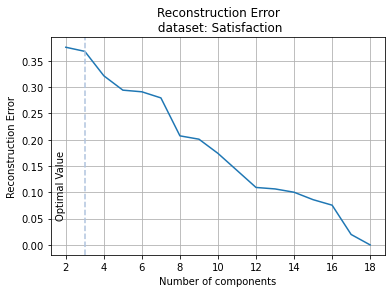

In [90]:
plt.plot(range(2, initial_features_n+1), reconstruction_error)
plt.axvline(optimal_features_grp, linestyle='--', color="lightsteelblue")
plt.text(optimal_features_grp-1.5, 0.05,'Optimal Value', rotation=90)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error\n dataset: Satisfaction')
plt.grid(True)
plt.show()


# NN

## NN with raw data

In [ ]:
NN_classifier_4 = MLPClassifier(activation='logistic', hidden_layer_sizes = (110,), 
                                learning_rate_init = 0.1, max_iter = 500,
                                random_state=7)
NN_classifier_4.fit(X_train,y_train)

In [ ]:
print('Cross Validation Score:'
     )
CVscores_train = cross_val_score(NN_classifier_4, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(NN_classifier_4, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
NN_test_predict_4 = NN_classifier_4.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, NN_test_predict_4)
f1_test_predict = f1_score(y_test, NN_test_predict_4,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, NN_test_predict_4)
recall_test_predict = recall_score(y_test, NN_test_predict_4)
precision_test_predict = precision_score(y_test, NN_test_predict_4)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

In [ ]:
#Accuracy
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=NN_classifier_4, X=X_train, y=y_train, 
                                              train_sizes = train_sizes, cv=10, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Neural Network (raw data)')
plt.xlabel('Training sizes')
plt.ylabel("accuracy score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [61]:
def execute_best_MLPclassifier(X_train, X_test, y_train, y_test):
  mlp_best_clf = MLPClassifier(activation='logistic', hidden_layer_sizes = (110,), 
                                learning_rate_init = 0.1, max_iter = 500,
                                random_state=7)
  mlp_best_clf.fit(X_train, y_train)
  #Learning Curve
  train_sizes = np.linspace(0.1, 1.0, 5)
  train_sizes, train_scores, test_scores = learning_curve(mlp_best_clf, X_train, y_train, train_sizes=train_sizes, cv=10, n_jobs=-1)
  #plot_learning_curve(train_sizes, train_scores, test_scores, "Training Samples", "Score", "Learning Curve Neural Network")
  collect_classifier_metrics(mlp_best_clf, X_train, X_test, y_train, y_test, multi_class=False)
  y_pred = mlp_best_clf.predict(X_test)
  return train_sizes, train_scores, test_scores, y_pred

In [53]:
def plot_learning_curve(train_sizes, train_scores, test_scores, x_label, y_label, title):
  
  plt.figure()
  plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
  plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross Validation score')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend(loc="best")
  plt.grid()
  plt.show()

In [54]:
def collect_classifier_metrics(clf, X_train, X_test, y_train, y_test, multi_class=False):
    
  start_time = timeit.default_timer()
  clf.fit(X_train, y_train)
  end_time = timeit.default_timer()
  training_compute_times = end_time - start_time
  
  start_time = timeit.default_timer()    
  y_pred = clf.predict(X_test)
  end_time = timeit.default_timer()
  prediction_compute_times = end_time - start_time
  
  print("satisfaction")
  auc = 0.0
  if multi_class:
    y_test_binarize = label_binarize(y_test, classes=labels)
    y_pred_binarize  = label_binarize(y_pred, classes=labels)
    auc = roc_auc_score(y_test_binarize, y_pred_binarize)
  else:
    auc = roc_auc_score(y_test, y_pred)

  f1 = f1_score(y_test,y_pred, average='weighted')
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred, average='weighted')
  recall = recall_score(y_test,y_pred, average='weighted')
  print("F1 Score:", f1, "   ", "Accuracy:", accuracy, "   ", "AUC:", auc)
  print("Precision:", precision, "   ", "Recall:", recall)
  print("Training Time:", training_compute_times, "   ", "Prediction Time:", prediction_compute_times)

  print ("*******metrics from sklearn function********")
  print(classification_report(y_test, y_pred))

  pass  

In [62]:
train_sizes, train_scores, test_scores, y_pred = execute_best_MLPclassifier(X_train, X_test, y_train, y_test)

satisfaction
F1 Score: 0.9025927455813226     Accuracy: 0.902771667399912     AUC: 0.904547317537716
Precision: 0.9091545710188372     Recall: 0.902771667399912
Training Time: 3.2354716999998345     Prediction Time: 0.011022400000001653
*******metrics from sklearn function********
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3305
           1       0.96      0.85      0.90      3514

    accuracy                           0.90      6819
   macro avg       0.91      0.90      0.90      6819
weighted avg       0.91      0.90      0.90      6819



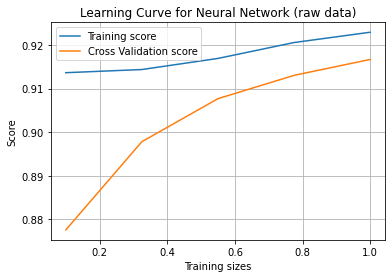

In [57]:
#Learning Curve
#train_sizes = np.linspace(0.1, 1.0, 5)
plot_learning_curve(train_sizes, train_scores, test_scores, "Training sizes", "Score", "Learning Curve for Neural Network (raw data)")

In [97]:
# Transform Data with PCA, ICA, GRP, LDA algorithms
X_pca = PCA(n_components=3, random_state=7).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(np.array(X_pca), np.array(y), test_size=0.2, random_state=7)
print("PCA ----> Total Features", len(X_train[0]), "PCA Features", len(X_pca[0]))
pca_train_sizes, pca_train_scores, pca_test_scores, pca_y_pred = execute_best_MLPclassifier(X_train, X_test, y_train, y_test)

PCA ----> Total Features 3 PCA Features 3
satisfaction
F1 Score: 0.6299107481608083     Accuracy: 0.6352837659480862     AUC: 0.6409567365954889
Precision: 0.6522906706857343     Recall: 0.6352837659480862
Training Time: 2.714360600000873     Prediction Time: 0.02163230000041949
*******metrics from sklearn function********
              precision    recall  f1-score   support

           0       0.59      0.77      0.67      2173
           1       0.71      0.51      0.59      2373

    accuracy                           0.64      4546
   macro avg       0.65      0.64      0.63      4546
weighted avg       0.65      0.64      0.63      4546



In [98]:
X_ica = FastICA(n_components=5, max_iter=10000, random_state=0, tol=1.5).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(np.array(X_ica), np.array(y), test_size=0.2, random_state=7)
print("ICA ----> Total Features", len(X_train[0]), "ICA Features", len(X_ica[0]))
ica_train_sizes, ica_train_scores, ica_test_scores, ica_y_pred = execute_best_MLPclassifier(X_train, X_test, y_train, y_test)

ICA ----> Total Features 5 ICA Features 5
satisfaction
F1 Score: 0.7572154693661977     Accuracy: 0.7571491421029476     AUC: 0.7582877939792445
Precision: 0.7593027557073115     Recall: 0.7571491421029476
Training Time: 7.776451600000655     Prediction Time: 0.007728099999440019
*******metrics from sklearn function********
              precision    recall  f1-score   support

           0       0.73      0.78      0.76      2173
           1       0.79      0.73      0.76      2373

    accuracy                           0.76      4546
   macro avg       0.76      0.76      0.76      4546
weighted avg       0.76      0.76      0.76      4546



In [99]:
X_grp = random_projection.GaussianRandomProjection(n_components=3, random_state=7).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(np.array(X_grp), np.array(y), test_size=0.2, random_state=7)
print("GRP ----> Total Features", len(X_train[0]), "GRP Features", len(X_grp[0]))
grp_train_sizes, grp_train_scores, grp_test_scores, grp_y_pred = execute_best_MLPclassifier(X_train, X_test, y_train, y_test)

GRP ----> Total Features 3 GRP Features 3
satisfaction
F1 Score: 0.309182835550432     Accuracy: 0.47800263968323803     AUC: 0.5
Precision: 0.22848652354414345     Recall: 0.47800263968323803
Training Time: 2.626929800000653     Prediction Time: 0.020324800001617405
*******metrics from sklearn function********
              precision    recall  f1-score   support

           0       0.48      1.00      0.65      2173
           1       0.00      0.00      0.00      2373

    accuracy                           0.48      4546
   macro avg       0.24      0.50      0.32      4546
weighted avg       0.23      0.48      0.31      4546



In [103]:
X_grp

array([[ -794.78672545, -2726.54762136,  2577.9901637 ],
       [ -516.15538039, -1829.68431958,  1725.68797048],
       [  -50.06238169,  -431.97262286,   347.27039721],
       ...,
       [  -29.6903148 ,  -243.49529605,   205.57133237],
       [ -157.74122743,  -568.77182162,   538.29143883],
       [ -294.90963747,  -996.61599751,   945.52513883]])

In [120]:
def rfc_research(X,y):         
        rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=7, n_jobs=-1)
        fs = rfc.fit(X,y).feature_importances_
        return fs
        
def rfc(X,y):
                 
        rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=7, n_jobs=-1)
        fs = rfc.fit(X,y).feature_importances_
        indexes_found = np.where(fs >= 0.05)
        #print("index:",indexes_found[0])
        
        X_reduced = pd.DataFrame(X)
        #print("X_reduced",X_reduced)
        filter_columns = [list(X_reduced.columns)[i] for i in indexes_found[0]] 
        #print(filter_columns)
        X_reduced = X_reduced.filter(filter_columns, axis=1)
        #print(X_reduced)
        
        return X_reduced
important = rfc_research(X_train, y_train)
important_df = pd.DataFrame(columns=LABELS)
df_length = len(important_df)
important_df.loc[df_length] = important
print("*** importance ***:")
#print(pd.Series(important))

print(rfc(X_train, y_train))

*** importance ***:
             0         1    2    7    9    11
0      0.307692  0.351373  0.6  0.6  0.6  0.8
1      0.551282  0.338853  0.8  0.6  0.8  0.8
2      0.551282  0.404483  0.8  1.0  0.8  0.8
3      0.538462  0.491115  0.4  0.2  1.0  1.0
4      0.320513  0.090872  0.4  0.4  0.4  0.6
...         ...       ...  ...  ...  ...  ...
15906  0.384615  0.063207  0.2  0.2  0.4  1.0
15907  0.512821  0.015347  1.0  1.0  1.0  1.0
15908  0.615385  0.167811  0.6  0.4  0.6  0.6
15909  0.243590  0.195679  0.2  0.2  0.2  0.4
15910  0.320513  0.167811  0.0  0.0  1.0  0.4

[15911 rows x 6 columns]


In [123]:
X_rfc0 = rfc(X_train, y_train)
#X_rfc0.values

In [126]:
X_rfc = X_rfc0.values
X_train, X_test, y_train, y_test = train_test_split(np.array(X_rfc), np.array(y_train), test_size=0.2, random_state=7)
print("RFC ----> Total Features", len(X_train[0]), "RFC Features", len(X_rfc[0]))
rfc_train_sizes, rfc_train_scores, rfc_test_scores, rfc_y_pred = execute_best_MLPclassifier(X_train, X_test, y_train, y_test)

RFC ----> Total Features 6 RFC Features 6
satisfaction
F1 Score: 0.8854912605874395     Accuracy: 0.8856424756519007     AUC: 0.8848694971908114
Precision: 0.886464739400775     Recall: 0.8856424756519007
Training Time: 42.15885789999993     Prediction Time: 0.00952289999986533
*******metrics from sklearn function********
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1635
           1       0.90      0.86      0.88      1548

    accuracy                           0.89      3183
   macro avg       0.89      0.88      0.89      3183
weighted avg       0.89      0.89      0.89      3183



<Figure size 432x288 with 0 Axes>

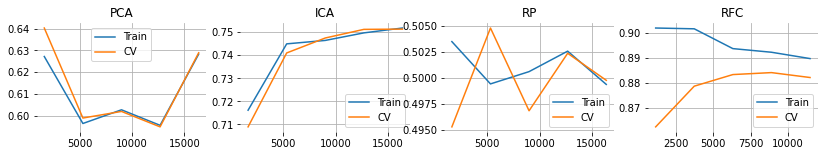

In [127]:
# Plot Graphs
all_dr = ["PCA", "ICA", "RP", "RFC"]

plt.figure()
all_train_sizes = {"PCA": pca_train_sizes, "ICA": ica_train_sizes, "RP": grp_train_sizes, "RFC": rfc_train_sizes}
all_train_scores = {"PCA": pca_train_scores, "ICA": ica_train_scores, "RP": grp_train_scores, "RFC": rfc_train_scores}
all_test_scores = {"PCA": pca_test_scores, "ICA": ica_test_scores, "RP": grp_test_scores, "RFC": rfc_test_scores}

plt.figure(figsize=(14, 2))

for i, val in enumerate(all_dr):
  plt.subplot(1, 4, i+1, frame_on=False)
  plt.plot(all_train_sizes[val], np.mean(all_train_scores[val], axis=1), label='Train')
  plt.plot(all_train_sizes[val], np.mean(all_test_scores[val], axis=1), label='CV')
  plt.title(val)
  #plt.xlabel("Training Samples")
  #plt.ylabel("Score")
  plt.legend(loc="best")
  plt.grid(True)
plt.show()